In [2]:
# Imports

import numpy as np
import matplotlib.pyplot as plt

In [35]:
# A helper function to draw a 3D function with 2 variables on 2D (Contour plot)

def graph(LIST):
  plt.figure(figsize=(18,8))
  X = np.linspace(-2, 8, 200)
  Y = np.linspace(-2, 2, 200)
  x, y = np.meshgrid(X, Y)
  f = (1/2) * x**2 + (7/2) * y**2
  ctr = plt.contour( x, y, f, levels=9, colors='k')
  fil = plt.contourf(x, y, f, levels=10)
  plt.clabel(ctr)
  plt.scatter(np.array(LIST)[:,0],np.array(LIST)[:,1],c='yellow',s=30,marker="x")
  plt.show()

In [4]:
# Helper function that performs gradient descent with constant step and returns the coordinates of the minimum, the number of iterations
# to find it and a list of all points traversed to plot them 

def gradient_descent_constant_step(taux_apprentissage, x0, eps, A, B):
  LIST=[]
  xn = x0
  xn_1 = xn - taux_apprentissage * (A @ xn - B)
  i = 1
  print("Iteration: " + str(i) + " | Loss: " + str(((xn_1 - xn)**2).sum()))
  while (((xn_1 - xn)**2).sum() > eps):
    LIST.append(xn)
    xn = xn_1
    xn_1 = xn - taux_apprentissage * (A @ xn - B)
    i += 1
    print("Iteration: " + str(i) + " | Loss: " + str(((xn_1 - xn)**2).sum()))
  return xn_1, i, LIST

# Initialisation of all necessary variables

taux_apprentissage = 1/7
x0 = np.array([7,1.5])
eps = 1/1000
A = np.array([[1,0],[0,7]])
B = np.array([0,0])

Iteration: 1 | Loss: 3.25
Iteration: 2 | Loss: 0.7346938775510198
Iteration: 3 | Loss: 0.5397750937109537
Iteration: 4 | Loss: 0.396569456603966
Iteration: 5 | Loss: 0.29135715179066896
Iteration: 6 | Loss: 0.21405831560130797
Iteration: 7 | Loss: 0.15726733391116499
Iteration: 8 | Loss: 0.11554334736330485
Iteration: 9 | Loss: 0.08488898989957094
Iteration: 10 | Loss: 0.0623674211507051
Iteration: 11 | Loss: 0.04582096247806911
Iteration: 12 | Loss: 0.03366438059613237
Iteration: 13 | Loss: 0.02473301431552583
Iteration: 14 | Loss: 0.018171194190998576
Iteration: 15 | Loss: 0.013350265119917326
Iteration: 16 | Loss: 0.009808358047286195
Iteration: 17 | Loss: 0.007206140606169457
Iteration: 18 | Loss: 0.005294307384124493
Iteration: 19 | Loss: 0.003889695220989424
Iteration: 20 | Loss: 0.002857735264400393
Iteration: 21 | Loss: 0.002099560602416617
Iteration: 22 | Loss: 0.0015425343201428186
Iteration: 23 | Loss: 0.0011332905209212548
Iteration: 24 | Loss: 0.0008326216072074534

the mi

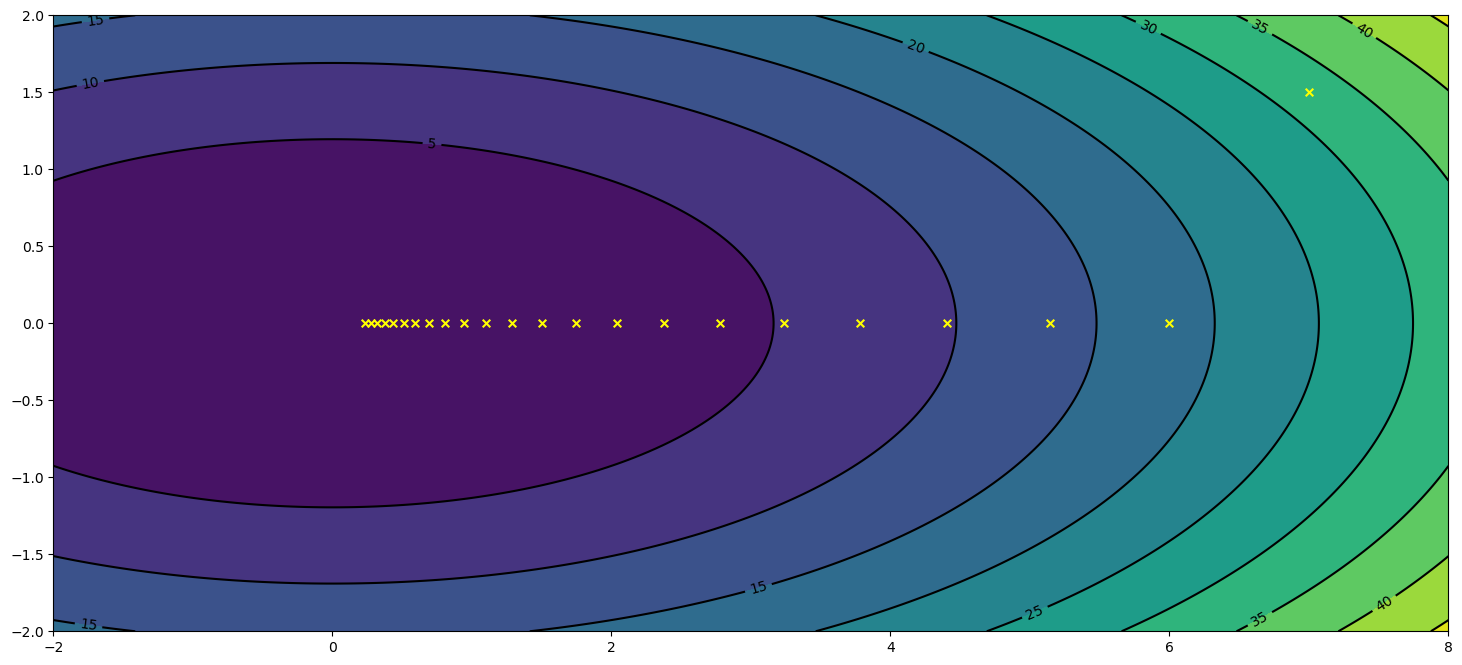

In [38]:
# calling the helper function, printing the coordinates of the minimum and plotting the function and the history of traversed points

X, I, LIST = gradient_descent_constant_step(taux_apprentissage, x0, eps, A, B)
print("\nthe minimum is x = " + str(X[0]) + " and y = " + str(X[1]) + " and was found within " + str(I) + " Iterations.\n")
graph(LIST)

In [29]:
# Helper function that performs gradient descent with optimal step that returns the same output as the function above

def gradient_descent_optimal_step(x0, eps):
  LIST=[]
  A = np.array([[1,0],[0,7]])
  B = np.array([0,0])
  xn = x0
  if (abs(xn[0]) + abs(7*xn[1]) == 0):
    return xn, 0
  taux_apprentissage = (xn[0]**2 + 49 * xn[1]**2) / (xn[0]**2 + 343 * xn[1]**2)
  xn_1 = xn - taux_apprentissage * (A @ xn - B)
  i = 1
  print("Iteration: " + str(i) + " | Loss: " + str(((xn_1 - xn)**2).sum()))
  while ((((xn_1 - xn)**2).sum() > eps) and (abs(xn_1[0]) + abs(7*xn_1[1]) != 0)):
    LIST.append(xn)
    xn = xn_1
    taux_apprentissage = (xn[0]**2 + 49 * xn[1]**2) / (xn[0]**2 + 343 * xn[1]**2)
    xn_1 = xn - taux_apprentissage * (A @ xn - B)
    i += 1
    print("Iteration: " + str(i) + " | Loss: " + str(((xn_1 - xn)**2).sum()))
  return xn_1, i, LIST

# Initialisation of all necessary variables

x0 = np.array([7,1.5])
eps = 1/1000

Iteration: 1 | Loss: 5.995377589663623
Iteration: 2 | Loss: 5.6756825100102635
Iteration: 3 | Loss: 1.6386020345229007
Iteration: 4 | Loss: 1.551225885129059
Iteration: 5 | Loss: 0.44784779396909336
Iteration: 6 | Loss: 0.42396694009053665
Iteration: 7 | Loss: 0.12240168285973163
Iteration: 8 | Loss: 0.11587478523463277
Iteration: 9 | Loss: 0.03345371389264515
Iteration: 10 | Loss: 0.03166984163978679
Iteration: 11 | Loss: 0.009143264594600948
Iteration: 12 | Loss: 0.008655712866766137
Iteration: 13 | Loss: 0.0024989538595074404
Iteration: 14 | Loss: 0.002365700658817852
Iteration: 15 | Loss: 0.0006829913240873108

the minimum is x = 0.0602166124972485 and y = -0.005734915475928429 and was found within 15 Iterations.



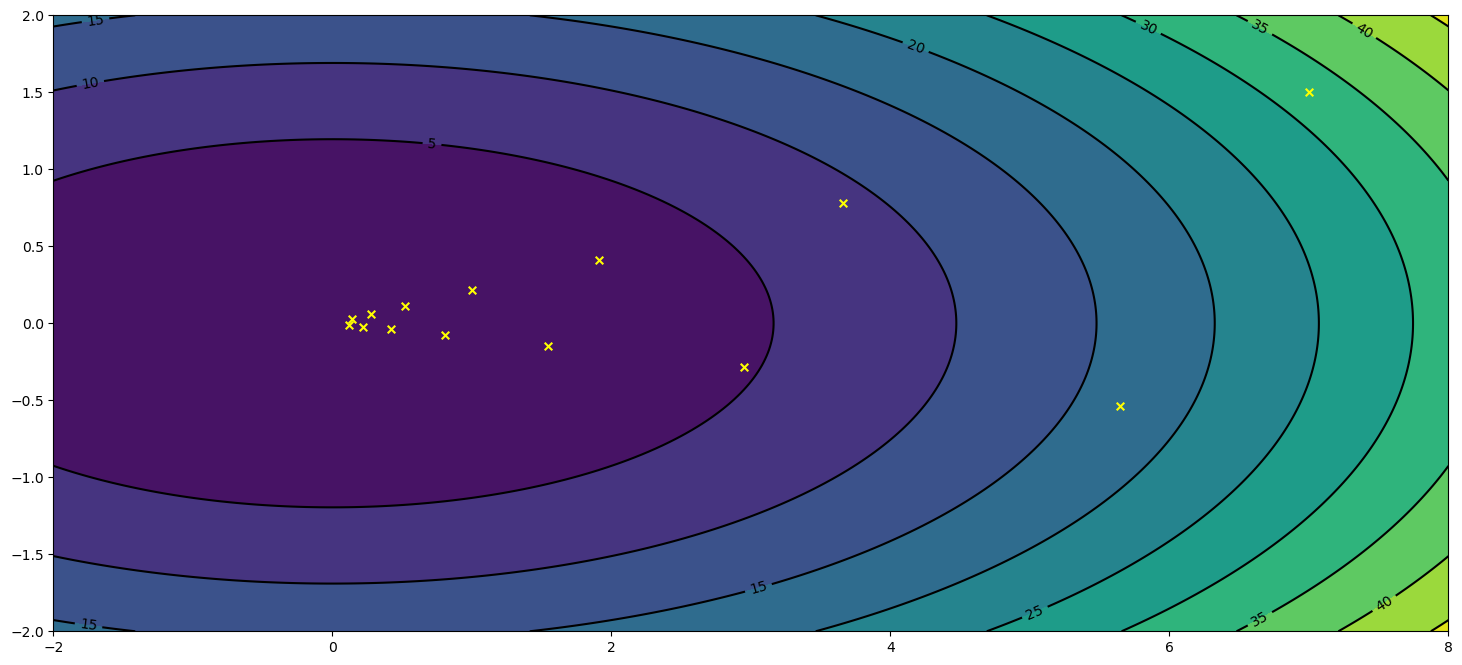

In [39]:
# calling the helper function, printing the coordinates of the minimum and plotting the function and the history of traversed points

X, I, LIST = gradient_descent_optimal_step(x0, eps)
print("\nthe minimum is x = " + str(X[0]) + " and y = " + str(X[1]) + " and was found within " + str(I) + " Iterations.\n")
graph(LIST)

In [31]:
# Helper function that performs Nesterov Accelerated gradient descent that returns the same output as the two functions above

def nesterov_accelerated_gradient_descent(taux_apprentissage, x0, eps, beta, A, B):
  LIST=[]
  xn = x0
  xn__1 = x0
  xn_1 = xn - taux_apprentissage * (xn - beta * (xn - xn__1)) + beta * (xn - xn__1)
  i = 1
  print("Iteration: " + str(i) + " | Loss: " + str(((xn_1 - xn)**2).sum()))
  while (((xn_1 - xn)**2).sum() > eps):
    LIST.append(xn)
    xn__1 = xn
    xn = xn_1
    xn_1 = xn - taux_apprentissage * (xn - beta * (xn - xn__1)) + beta * (xn - xn__1)
    i += 1
    print("Iteration: " + str(i) + " | Loss: " + str(((xn_1 - xn)**2).sum()))
  return xn_1, i, LIST

# Initialisation of all necessary variables

taux_apprentissage = 1/7
x0 = np.array([7,1.5])
eps = 1/1000
beta = (7 ** (1/2) - 1) / (7 ** (1/2) + 1)
A = np.array([[1,0],[0,7]])
B = np.array([0,0])

Iteration: 1 | Loss: 1.0459183673469388
Iteration: 2 | Loss: 1.9718263800431202
Iteration: 3 | Loss: 1.9612336756867734
Iteration: 4 | Loss: 1.4362323457589765
Iteration: 5 | Loss: 0.8519408278825222
Iteration: 6 | Loss: 0.4212744696956638
Iteration: 7 | Loss: 0.1722269546318854
Iteration: 8 | Loss: 0.055209360319862746
Iteration: 9 | Loss: 0.011776350922037424
Iteration: 10 | Loss: 0.0007717964703680807

the minimum is x = -0.2202110560983429 and y = -0.04718808344964488 and was found within 10 Iterations.


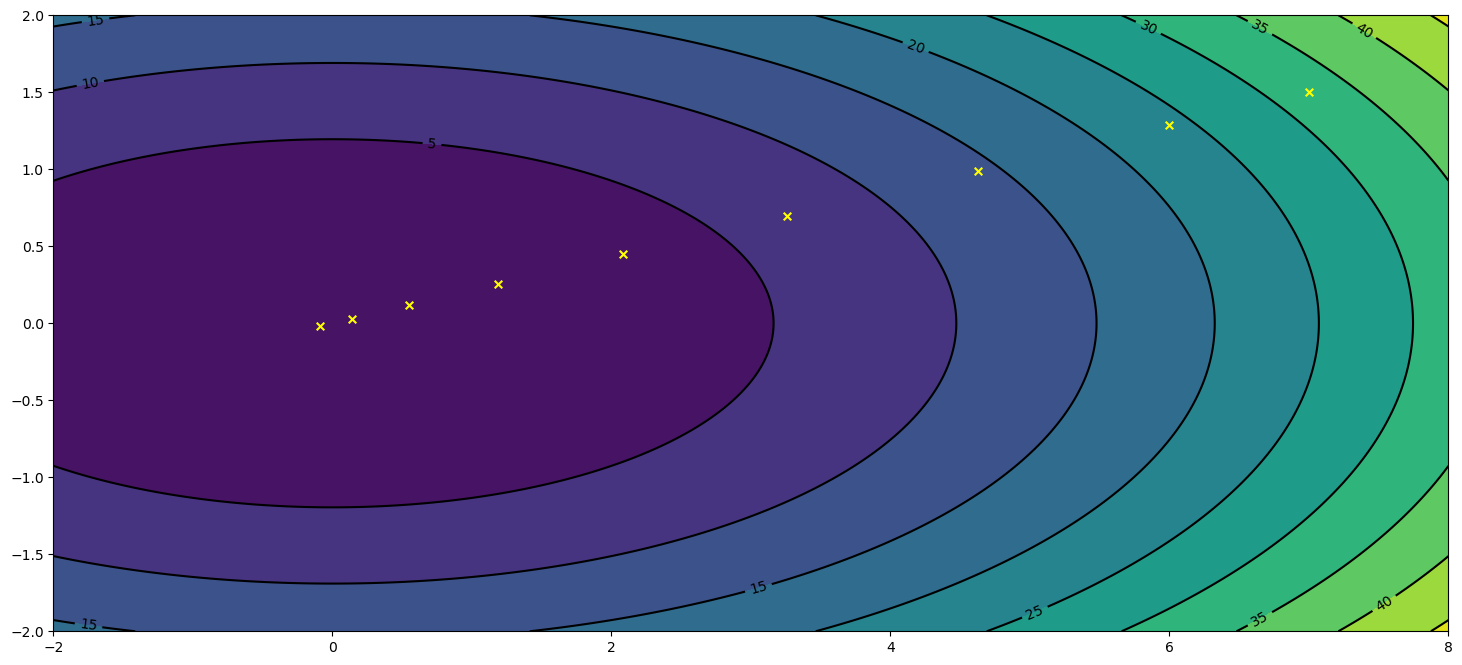

In [40]:
# calling the helper function, printing the coordinates of the minimum and plotting the function and the history of traversed points

X, I, LIST = nesterov_accelerated_gradient_descent(taux_apprentissage, x0, eps, beta, A, B)
print("\nthe minimum is x = " + str(X[0]) + " and y = " + str(X[1]) + " and was found within " + str(I) + " Iterations.")
graph(LIST)